<a href="https://colab.research.google.com/github/msaadsadiq/BigDataCourse/blob/master/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECE 795 - Big Data - Project 2
## Comprehensive Design of Big Data Analysis

In this project, you will need to leverage the knowledge and tools discussed in this course to design a comprehensive workflow of big data analysis.
There is no strict limitation in how you accomplish the task but you should satisfy the need as mentioned in the project description. You should try your best to utilize the tools related to big data analysis, including HDFS, Spark, Sqoop, BigQuery, etc, unless otherwise specified. Although you may only deal with a small portion of the data to illustrate the effectiveness of the workflow, please keep in mind that your design should be able to scale to large volumes of data. For example, you might be able to store certain data in .csv file but it should be more appropriate to store it in HDFS with an approriate format.

Please make sure to provide sufficient comments on your code to get the full credit.

You need to prepare a report along with the codes that you use for each task for this project. The report should describe the detailed instructions, your findings, and some discussions about the results.Please turn in a written report of your project (no more than 6 pages in the same template as in the first project) including:
- Instructions on how to compile and run your program
- Documented program listings
- The design of your implementation
- Detailed discussion of your implementation and analysis
- Necessary diagram(s), flowchart(s), pseudo code(s), etc. for your implementation
- A conclusion, summarizing your understanding and analysis
- A list of references, if any.

The final report (submitted to blackboard) and codes are due on April 25, 2019. Please allow Yudong Tao (yudongtao93@gmail.com) to access your GCP project for the grading.

Project demonstration (no more than 10 minutes) is on April 18, 2019 (Tasks 1 & 2), April 23, 2019 (Tasks 3 & 4) and April 25, 2019 (Task 5).


You always need to setup the environment in Google Cloud Platform as you did in Assignment 3.

Please reference the [document](https://cloud.google.com/compute/docs/instances/connecting-advanced#thirdpartytools) to use ssh to connect to the instances in the cluster. Please reference the [document](https://cloud.google.com/compute/docs/instances/connecting-advanced#root) to connect to the instances as the root user. (You may need this to install some software)

The HDFS configured in the cluster is automatically linked to bucket (Google Storage). To access the storage, you can simply replace `hdfs://` with `gs://` in command line with `hadoop`.
For example, to put a local file in cluster to the root of the bucket, you can simply use `hadoop fs -put /path/to/local/file gs://`.

Please email yxt128@miami.edu if you have any question regarding using GCP and the project.


## Task 1: Sentiment Analysis on Amazon Reviews
1.	Download review data of one category from the [link](http://jmcauley.ucsd.edu/data/amazon/) and store it in HDFS.
2.	Use pyspark to do sentiment analysis on the reviews with the model you trained in Assignment #3 and save your results.
3.	Write a SQL statement to get (1) the number of reviews with positive sentiment but with 1-2 star rating and (2) the number of reviews with negative sentiment but with 3-5 star rating.
4.	Repeat Steps 2-5 for 5 more categories, and write a python code to plot the result changes of Step 5 over categories.
5.	Compare the computing time of sentiment analysis on all 6 categories with various data partitions.


## Task 2: Best Friends in New York Social Diary Data

"Best friends" is defined as the pair of persons has the highest number of times that appear in the same photos of different parties (appearing in two photos in the same party counts only once).

1.	Design a SQL statement to find out the top-200 pairs of best friends. Record the computing time of the query.
2.	Export the data from BigQuery into HDFS.
3.	Use pyspark and RDD to compute the top-200 pairs of best friends. Record the computing time.
4.	Use avro and parquet formats to store the data. Repeat Step 4 again and record the computing time.
5.	Compare the computing times of various approaches and discuss the possible reasons.


## Task 3: Edge Detection on Images from URLs
1.	Download images based on the provided urls.csv file with wget command in python. (Use Spark or the alternatives, optional)
2.	Properly store and manage your images in HDFS.
3.	Perform edge detection on these images and save the results in HDFS properly. Record the computing time with and without saving the images (Use Spark or the alternatives).
4.	Load the edge images and count how many pixels are considered as edges. Record the computing time (Use Spark or the alternatives).
5.	Repeat Steps 4 and 5 but do it from the original images to the number of pixels directly. Record the computing time. Compare the computing time of the two approaches and discuss why there is a change or why there is no change.

You may reference the following codes for edge detection by using cv2.Canny(). You may use any other edge detectors as long as it works. The performance of the edge detection does not matters.

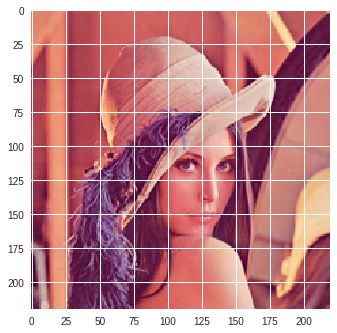

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the original image
img = cv2.imread("example.png")  # You need this command to load image for the pj

# Show image
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)

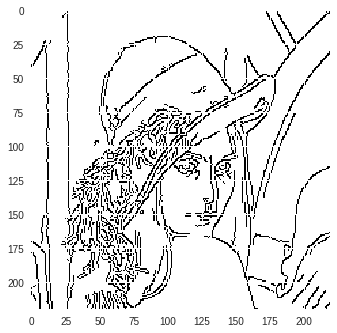

In [0]:
# Detect Edge
edges = cv2.Canny(img,100,200) # You need this command to generate edge for the pj
# After execute the above command, you need to count how many pixels are in black color

# Display Edge
plt.imshow(edges)

## Task 4: Number of Faces in New York Social Diary Photos
1.	As the way you did in Assignment #2, find the url of all the photos in "Party" and download at least 30k images that you find to the GCP cluster.
2.	Properly store and manage those images in HDFS.
3.	Detect the faces in all the downloaded photos and store the results properly.
4.	Count how many faces appear in each image and record the computing time (Use Spark or the alternatives).
5.	By incorporating the results in Assignment #2, you can find the number of names for each corresponding photo. For each photo, compare the number of names with the number of faces detected and see how many photos match the name and face pairs (Use Spark/SQL or the alternatives).
6.	Repeat Steps 2-6 after increasing the number of workers to 3 and 4 in the cluster as described in the link. Compare the computing times before and after the changes and plot the figure "Computing time vs. #workers".

You may reference the [link](https://www.programcreek.com/python/example/103113/dlib.get_frontal_face_detector) for face detection by using dlib.get_frontal_face_detector(). You may use any other face detectors as long as it works. It is okay that the detector does not get all the face in the images.


## Task 5: Word Count on Streaming Tweets
1.	Install Flume and configure it correctly in your clusters.
2.	Using Flume to import Tweets from [Twitter API](https://developer.twitter.com/en/docs.html) with the keywords of your selection.
3.	Use pyspark to do word count for all the newly coming tweets every minute and save the results.
4.	Write a SQL statement to count the number of tweets with the word count between a given range.
5.	Write a python code to plot the distribution of tweet word count given the interval=5.
6.	Compare the performance of computing the word count distribution based on raw data and based on the results. Try it multiple times when the amounts of tweets are different. Plot the figure "computing time vs. the number of tweets".

You may reference the [tutorial](https://www.tutorialspoint.com/apache_flume/fetching_twitter_data.htm) for step 2 and 3.

To do word count perodically, you may try one of the following ways:
- use time.sleep() function
- use Spark Streaming library as introduced [here](https://spark.apache.org/docs/2.2.0/streaming-flume-integration.html)

